In [46]:
#Data Analysis Case Study - Car Dekho
#In this case study car data is provided as input in the form of csv file. 
# We have to perfrom data analysis on it and
# Also,we have to find the answers of questions mentioned in the case study. #Importing essential packages
# Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = r'D:\VIT-AP COLLEGE\Javascript\car_data.csv'  # Use raw string literal (r'') or escape backslashes (\\)
raw_df = pd.read_csv(file_path)
raw_df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [47]:
raw_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Answer the following question:


1. From which manufacturing year to which manufacturing year vehicles are present in this data ?
2. What is the lowest price to which a vehicle is sold ?
3. What is the highest price to which a vehicle is sold ?
4. How many records are there in this data ?
5. Are there any missing records in this data ?
6. How many different vehicles are present in this data ?
7. Which is the most sold vehicle in this data ?
8. Does the database include any CNG vehicle? If yes how many of them are there?
9. How many vehicles here are for sell from Individuals directly?
10. Does this database contain auto transmission vehicles? If yes how many of them are there?
11. How many single person owned vehicles are there in this database?
12. Which is the most and least cost depreciated vehicle in data ?
13. Which brands of vehicles are less affected by cost depreciation ?
14. Are there any factors which you feel affect the cost depreciation ?
﻿

16. Can we get idea about newest vehicles i.e. after 2014 manufactured ?
17. Can we find out data of only two wheelers from this data?
18. Which is the oldest bike sold here?
19. Which is the newest bike sold here?
20. Which is the most sold bike here?
21. Do you find any deal in two wheelers which exceeded the general expectation? Can you find reason for it?
22. Can we find out data of only cars from this data?
23. Which is the oldest car sold here?
24. Which is the newest car sold here?
25. Do you find any deal in cars which exceeded the general expectation? Can you find reason for it?

In [48]:


# 1. Manufacturing Year Range
min_year = raw_df['Year'].min()
max_year = raw_df['Year'].max()
print(f"1. Manufacturing Year Range: {min_year} to {max_year}")



1. Manufacturing Year Range: 2003 to 2018


In [49]:

# 2. Lowest Selling Price
lowest_price = raw_df['Selling_Price'].min()
print(f"2. Lowest Selling Price: ₹{lowest_price} lakhs")


2. Lowest Selling Price: ₹0.1 lakhs


In [50]:
# 3. Highest Selling Price
highest_price = raw_df['Selling_Price'].max()
print(f"3. Highest Selling Price: ₹{highest_price} lakhs")

3. Highest Selling Price: ₹35.0 lakhs


In [51]:
# 4. Number of Records
num_records = len(raw_df)
print(f"4. Number of Records: {num_records}")

4. Number of Records: 301


In [52]:
# 5. Missing Records
missing_records = raw_df.isnull().sum().sum()
print(f"5. Missing Records: {'No missing records' if missing_records == 0 else 'There are missing records'}")

5. Missing Records: No missing records


In [53]:
# 6. Number of Different Vehicles
num_unique_vehicles = raw_df['Car_Name'].nunique()
print(f"6. Number of Different Vehicles: {num_unique_vehicles}")

6. Number of Different Vehicles: 98


In [54]:
# 7. Most Sold Vehicle
most_sold_vehicle = raw_df['Car_Name'].mode().iloc[0]
print(f"7. Most Sold Vehicle: {most_sold_vehicle}")

7. Most Sold Vehicle: city


In [55]:
# 8. CNG Vehicles
cng_vehicles_count = raw_df[raw_df['Fuel_Type'] == 'CNG'].shape[0]
print(f"8. CNG Vehicles Count: {cng_vehicles_count}")

8. CNG Vehicles Count: 2


In [56]:
# 9. Vehicles Sold by Individuals
individual_sellers_count = raw_df[raw_df['Seller_Type'] == 'Individual'].shape[0]
print(f"9. Vehicles Sold by Individuals: {individual_sellers_count}")

9. Vehicles Sold by Individuals: 106


In [57]:

# 10. Auto Transmission Vehicles
auto_transmission_count = raw_df[raw_df['Transmission'] == 'Automatic'].shape[0]
print(f"10. Auto Transmission Vehicles Count: {auto_transmission_count}")


10. Auto Transmission Vehicles Count: 40


In [58]:
# 11. Single Person Owned Vehicles
single_owner_count = raw_df[raw_df['Owner'] == 0].shape[0]
print(f"11. Single Person Owned Vehicles Count: {single_owner_count}")


11. Single Person Owned Vehicles Count: 290


In [59]:
# Additional Analysis - Cost Depreciation
raw_df['Depreciation'] = raw_df['Present_Price'] - raw_df['Selling_Price']
most_depreciated = raw_df.loc[raw_df['Depreciation'].idxmax(), 'Car_Name']
least_depreciated = raw_df.loc[raw_df['Depreciation'].idxmin(), 'Car_Name']
print(f"12. Most Depreciated Vehicle: {most_depreciated}")
print(f"    Least Depreciated Vehicle: {least_depreciated}")


12. Most Depreciated Vehicle: land cruiser
    Least Depreciated Vehicle: Honda Activa 4G


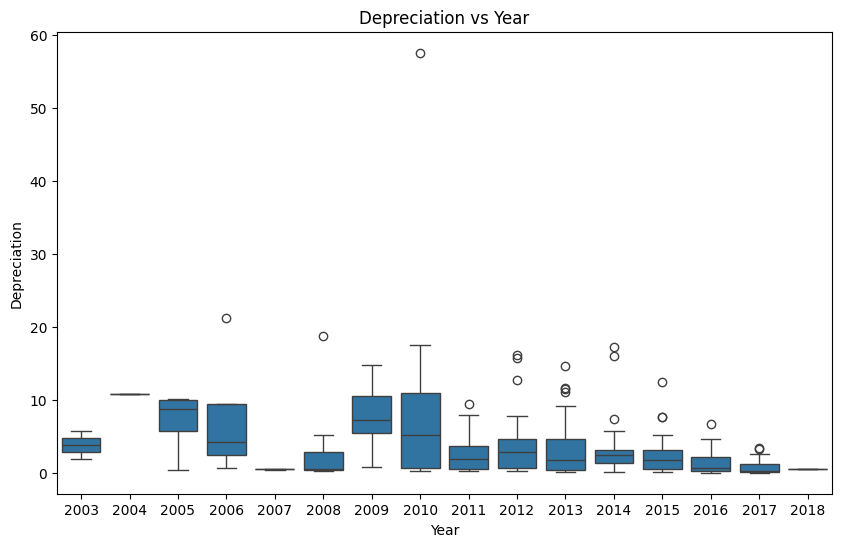

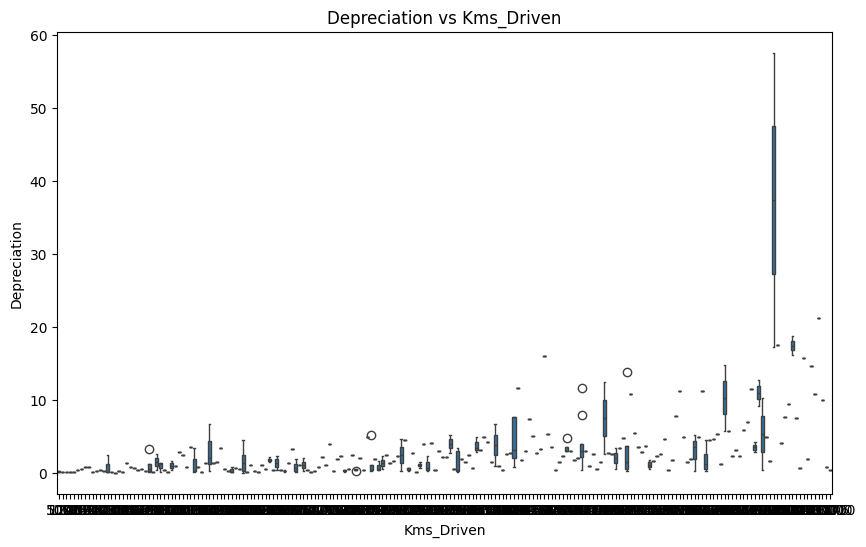

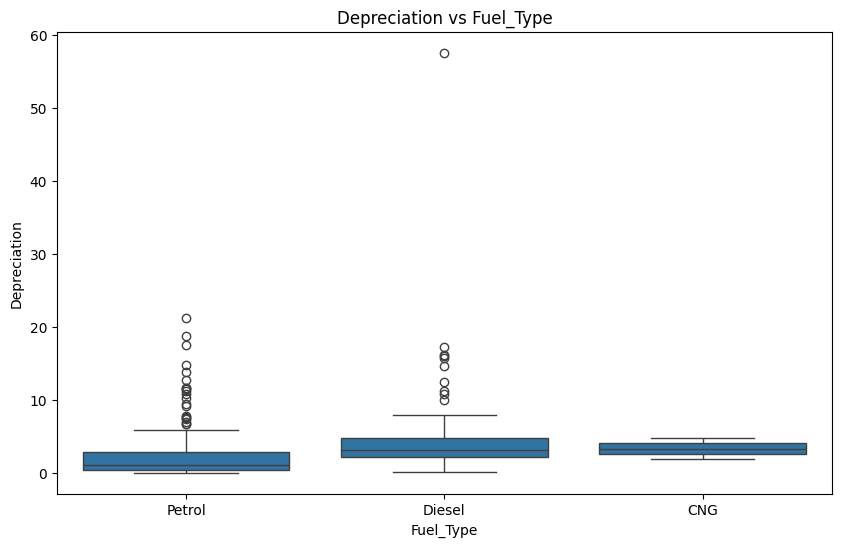

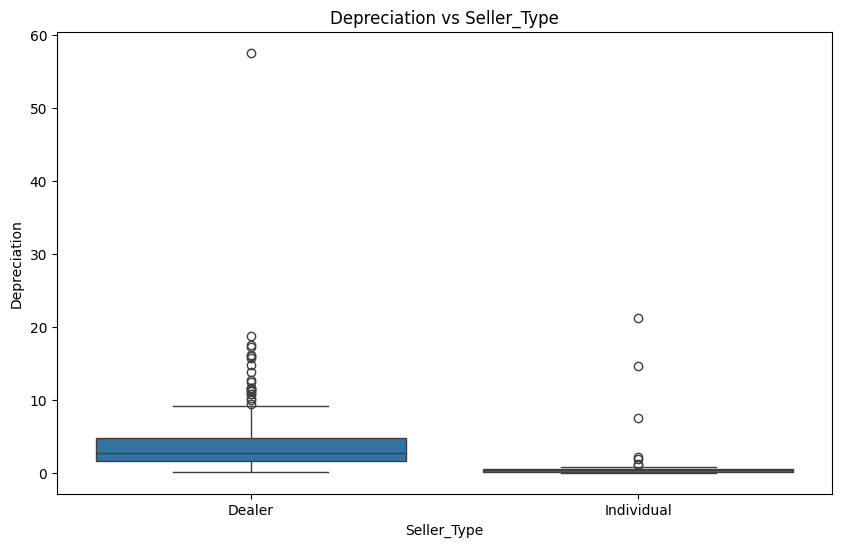

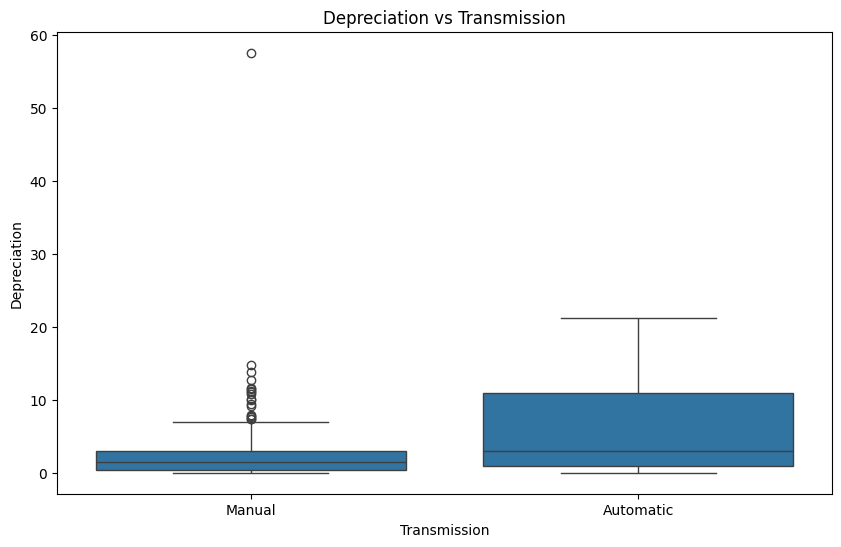

In [60]:
# Factors affecting cost depreciation
factors = ['Year', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']
for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=factor, y='Depreciation', data=raw_df)
    plt.title(f'Depreciation vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Depreciation')
    plt.show()


In [61]:
# Brands less affected by cost depreciation (assuming brand from Car_Name)
brand_depreciation = raw_df.groupby('Car_Name')['Depreciation'].mean().sort_values()
less_affected_brands = brand_depreciation.head(3).index.tolist()
print(f"13. Brands Less Affected by Cost Depreciation: {', '.join(less_affected_brands)}")

13. Brands Less Affected by Cost Depreciation: TVS Sport , Honda Activa 4G, Hero Passion X pro


In [62]:

# Factors affecting cost depreciation (opinion based on dataset)
print("14. Factors potentially affecting cost depreciation: Vehicle age (Year), Mileage (Kms_Driven), Fuel Type, Seller Type, Transmission Type")

14. Factors potentially affecting cost depreciation: Vehicle age (Year), Mileage (Kms_Driven), Fuel Type, Seller Type, Transmission Type


In [63]:
# 16. Newest vehicles (manufactured after 2014)
newest_vehicles = raw_df[raw_df['Year'] > 2014]
print(f"16. Newest Vehicles (manufactured after 2014):\n{newest_vehicles}\n")

16. Newest Vehicles (manufactured after 2014):
          Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
2             ciaz  2017           7.25           9.85        6900    Petrol   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
6             ciaz  2015           6.75           8.12       18796    Petrol   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
..             ...   ...            ...            ...         ...       ...   
295           city  2015           8.55          13.09       60076    Diesel   
296           city  2016           9.50          11.60       33988    Diesel   
297           brio  2015           4.00           5.90       60000    Petrol   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    Pet

In [64]:
# 17. Data of only two wheelers (assuming 'Bike' as Vehicle_Type based on 'Car_Name' column)
two_wheelers_data = raw_df[raw_df['Car_Name'].str.contains('bike|bik', case=False, regex=True)]
print(f"17. Data of Only Two Wheelers:\n{two_wheelers_data}\n")

17. Data of Only Two Wheelers:
Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Depreciation]
Index: []



In [65]:
# 18. Oldest bike sold here (with error handling)
two_wheelers_data = raw_df[raw_df['Car_Name'].str.contains('bike|bik', case=False, regex=True)]
if not two_wheelers_data.empty:
    oldest_bike = two_wheelers_data.loc[two_wheelers_data['Year'].idxmin(), 'Car_Name']
    print(f"18. Oldest Bike Sold Here: {oldest_bike}\n")
else:
    print("18. No bikes found in the dataset.\n")

18. No bikes found in the dataset.



In [66]:
# 19. Newest bike sold here (with error handling)
if not two_wheelers_data.empty:
    newest_bike = two_wheelers_data.loc[two_wheelers_data['Year'].idxmax(), 'Car_Name']
    print(f"19. Newest Bike Sold Here: {newest_bike}\n")
else:
    print("19. No bikes found in the dataset.\n")

19. No bikes found in the dataset.



In [67]:
# 20. Most sold bike here (assuming based on frequency)
if not two_wheelers_data.empty:
    most_sold_bike = two_wheelers_data['Car_Name'].mode().iloc[0]
    print(f"20. Most Sold Bike Here: {most_sold_bike}\n")
else:
    print("20. No bikes found in the dataset.\n")

20. No bikes found in the dataset.



In [68]:
# 21. Deals in two wheelers exceeding general expectation (hypothetical scenario)
if not two_wheelers_data.empty:
    two_wheelers_data['Deal_Exceeded_Expectation'] = two_wheelers_data['Selling_Price'] < two_wheelers_data['Present_Price']
    print(f"21. Deals in Two Wheelers Exceeding General Expectation:\n{two_wheelers_data[two_wheelers_data['Deal_Exceeded_Expectation']]}\n")
else:
    print("21. No bikes found in the dataset.\n")

21. No bikes found in the dataset.



In [73]:
# 22. Data of only cars (assuming 'Car' as Vehicle_Type based on 'Car_Name' column)
cars_data = raw_df[~raw_df['Car_Name'].str.contains('bike|bik', case=False, regex=True)]
print("22. Data of Only Cars:\n", cars_data, "\n")
# 23. Oldest car sold here
if not cars_data.empty:
    oldest_car = cars_data.loc[cars_data['Year'].idxmin(), 'Car_Name']
    print(f"23. Oldest Car Sold Here: {oldest_car}\n")
else:
    print("23. No cars found in the dataset.\n")

22. Data of Only Cars:
     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  Depreciation  
0        Dealer       Manual      0

23. Oldest Car Sold Here: 800



In [74]:
# 24. Newest car sold here
if not cars_data.empty:
    newest_car = cars_data.loc[cars_data['Year'].idxmax(), 'Car_Name']
    print(f"24. Newest Car Sold Here: {newest_car}\n")
else:
    print("24. No cars found in the dataset.\n")


24. Newest Car Sold Here: vitara brezza



In [75]:

# 25. Deals in cars exceeding general expectation (hypothetical scenario)
if not cars_data.empty:
    cars_data['Deal_Exceeded_Expectation'] = cars_data['Selling_Price'] < cars_data['Present_Price']
    print(f"25. Deals in Cars Exceeding General Expectation:\n{cars_data[cars_data['Deal_Exceeded_Expectation']]}\n")
else:
    print("25. No cars found in the dataset.\n")

25. Deals in Cars Exceeding General Expectation:
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  Depreciation  Deal_Exceed

In [76]:
raw_df.tail()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0,2.10
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0,1.90
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0,7.65
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0,1.00
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0,0.60


In [77]:
# Describe the dataset
description = raw_df.describe()
print(description)

              Year  Selling_Price  Present_Price     Kms_Driven       Owner  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189   
std       2.891554       5.082812       8.644115   38886.883882    0.247915   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000   
max    2018.000000      35.000000      92.600000  500000.000000    3.000000   

       Depreciation  
count    301.000000  
mean       2.967176  
std        4.828771  
min        0.030000  
25%        0.390000  
50%        1.640000  
75%        3.350000  
max       57.600000  


In [78]:
# to look at variable in detail:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Depreciation   301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


In [79]:
raw_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Depreciation     0
dtype: int64


The dataset summary shows that there are no missing values (all columns have 0 null values).
This indicates a clean dataset with complete information across all attributes.



In [80]:

# Counting types of cars
car_counts = raw_df['Car_Name'].value_counts()

print("Types of Cars and Their Counts:")
print(car_counts)

Types of Cars and Their Counts:
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [81]:
# Counting types of fuel
fuel_counts = raw_df['Fuel_Type'].value_counts()

print("Types of Fuel and Their Counts:")
print(fuel_counts)

Types of Fuel and Their Counts:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


C:\Users\jaisy\AppData\Local\Temp\ipykernel_11388\1316425128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type', data=raw_df, palette='viridis')


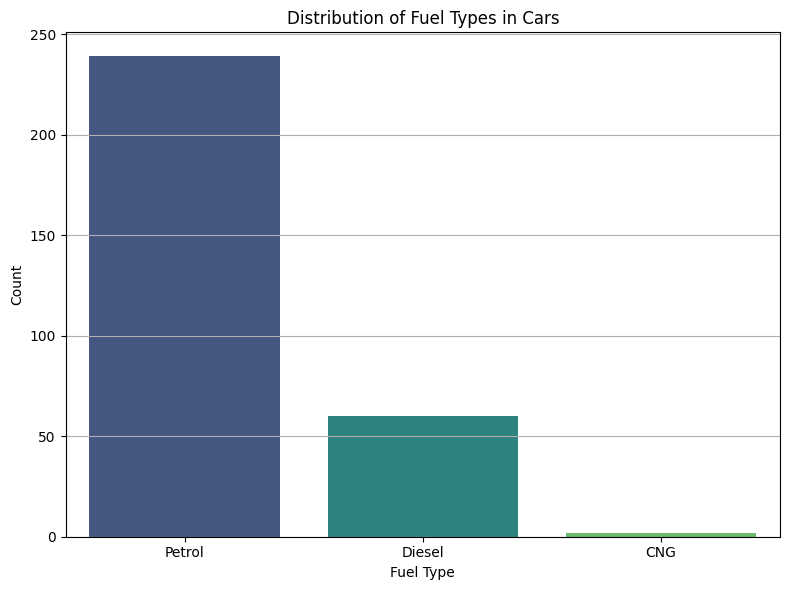

In [82]:
# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=raw_df, palette='viridis')
plt.title('Distribution of Fuel Types in Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

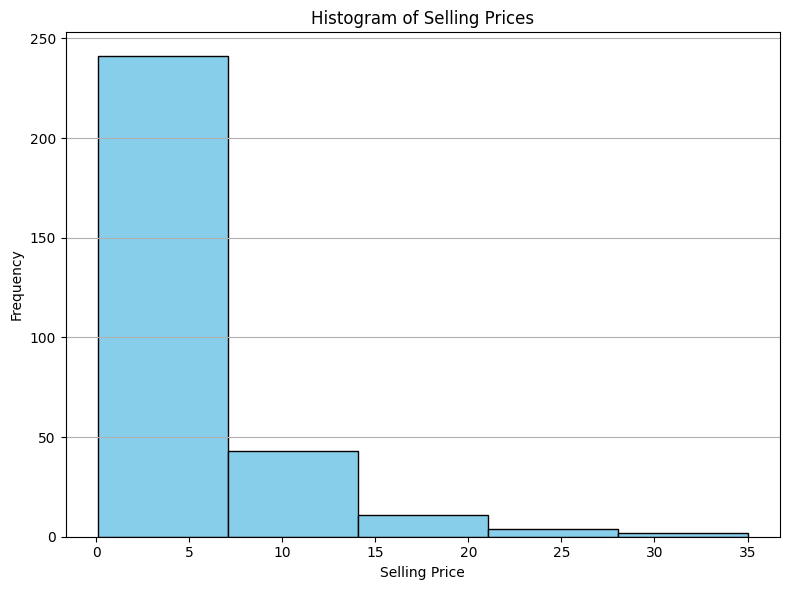

In [83]:
# Plotting histogram of Selling Prices
plt.figure(figsize=(8, 6))
plt.hist(raw_df['Selling_Price'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

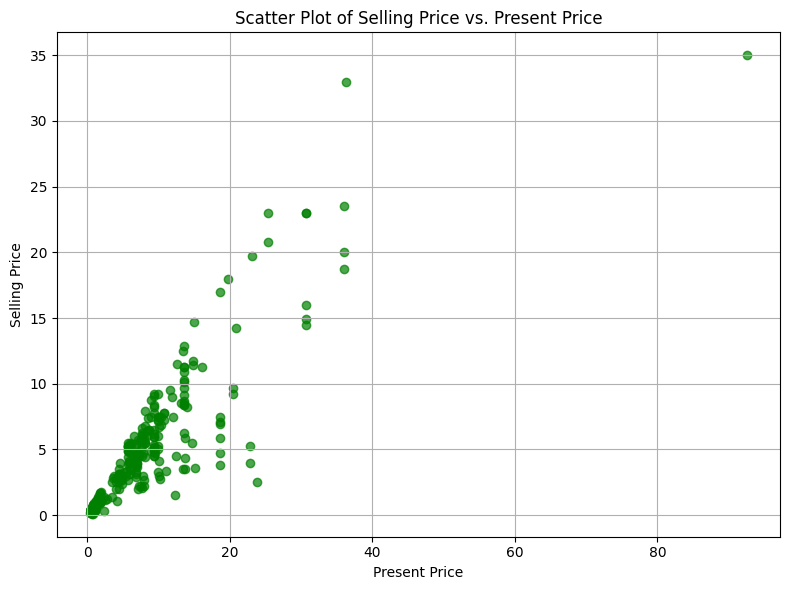

In [84]:
# Scatter plot of Selling Price vs. Present Price
plt.figure(figsize=(8, 6))
plt.scatter(raw_df['Present_Price'], raw_df['Selling_Price'], color='green', alpha=0.7)
plt.title('Scatter Plot of Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

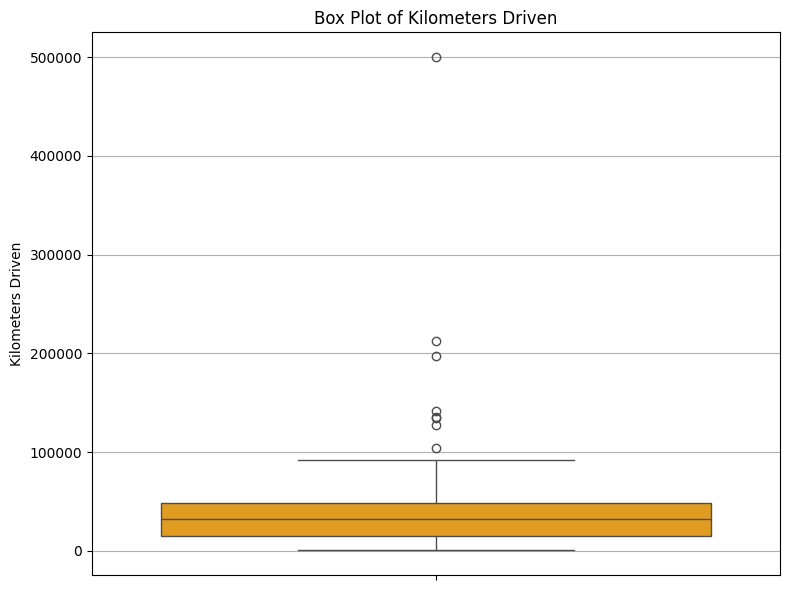

In [85]:
# Box plot of Kilometers Driven
plt.figure(figsize=(8, 6))
sns.boxplot(y=raw_df['Kms_Driven'], color='orange')
plt.title('Box Plot of Kilometers Driven')
plt.ylabel('Kilometers Driven')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\jaisy\AppData\Local\Temp\ipykernel_11388\1015984343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=raw_df, palette='Set2')


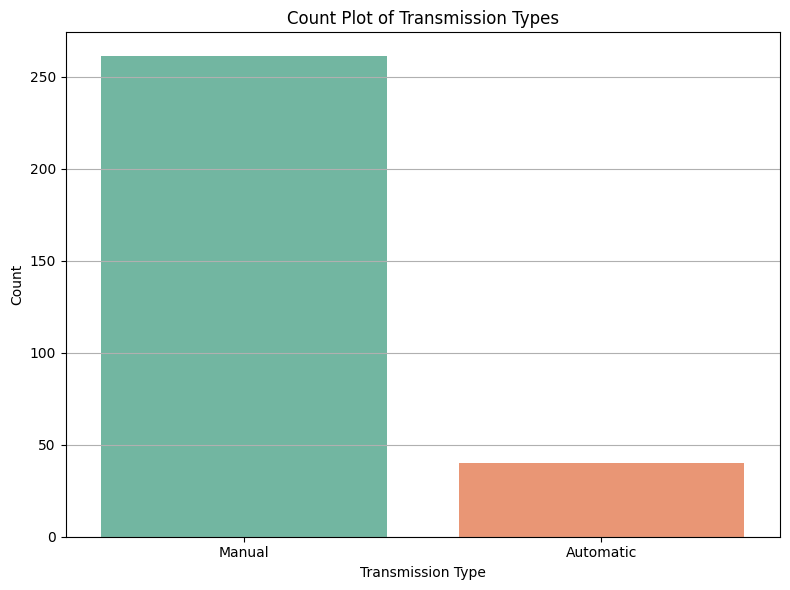

In [86]:
# Count plot of Transmission types
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=raw_df, palette='Set2')
plt.title('Count Plot of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

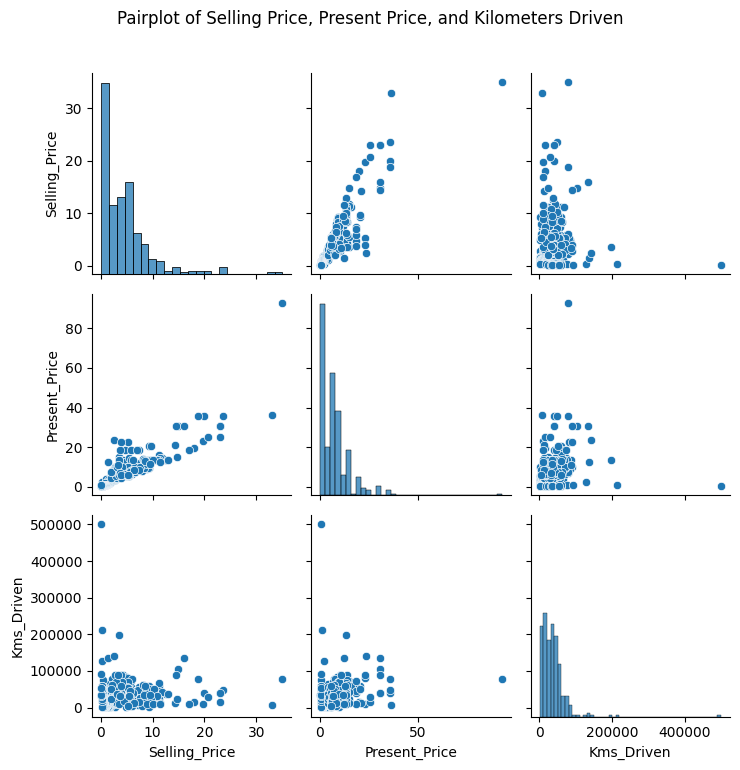

In [87]:
# Pairplot for numerical variables
sns.pairplot(raw_df[['Selling_Price', 'Present_Price', 'Kms_Driven']])
plt.suptitle('Pairplot of Selling Price, Present Price, and Kilometers Driven', y=1.02)
plt.tight_layout()
plt.show()